In [1]:
"""
FINITE ELEMENT
Two-Dimensional Triangular Element.

Created by:
Karina Chinas Fuentes

December 06, 2019


REFERENCE
This code was created by considering the The Finite Element Method:
Basic Concepts and Applications with MATLAB ® , MAPLE, and COMSOL
T H I R D     E D I T I O N
By: W. J. Minkowycz; and E. M. Sparrow.
"""

import pygmsh
import numpy as np
import sympy as sp
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage.filters import gaussian_filter

sp.init_printing(use_unicode=True)

# Final Project
## Heat transfer of a circular plate.

This code treats the solution of heat transfer and nodes displacement by using the Galerking 
Method.

In [2]:
# CHARACTERISTICS OF THE PHYSICAL SYSTEM
k     = 34            # thermal conductivity [W/m*C]
E     = 160*10**9     # Young's modulus [Pa]
alf   = 2.6*10**(-6)  # coefficient of thermal expansion [1/K]
v     = 0.22          # poisson's ratio [1]
t     = 0.1           # thickness [cm]
T0    = 900           # Known Temperature [K]

In [3]:
# TRIANGULAR ELEMENTS FOR A CIRCULAR PLATE
# APPROXIMATION DONE THROUGH TWO POLYGONS OF EIGHT EDGES

nA = 8  # Edges per polygon
nN = 25 # Number of nodes
nE = 32 # Number of elements

D = 10 # diameter of the plate in cm
d = D/2

a = D/np.sqrt(2)

b = d/np.sqrt(2)

c = d + 1.17*b

A1 = d*b/2
A2 = ((c-b)*(a-b))/2

xd,yd = sp.symbols('x_d,y_d')
xr,yr = sp.symbols('x_r,y_r')

# GENERAL CIRCLE: Scatter points
X = sp.Matrix([0,xr,xd,xr,0,-xr,-xd,-xr])
Y = sp.Matrix([yd,yr,0,-yr,-yd,-yr,0,yr])

# SMALL CIRCLE: blue dots
X1 = X.subs({xd:d,xr:b,yd:d,yr:b})
Y1 = Y.subs({xd:d,xr:b,yd:d,yr:b})

# LARGE CIRCLE 1: orange dots
X2 = X.subs({xd:D,xr:a,yd:D,yr:a})
Y2 = Y.subs({xd:D,xr:a,yd:D,yr:a})

# LARGE CIRCLE 1: green dots
X3 = sp.Matrix([b,c,c,b,-b,-c,-c,-b])
Y3 = sp.Matrix([c,b,-b,-c,-c,-b,b,c])


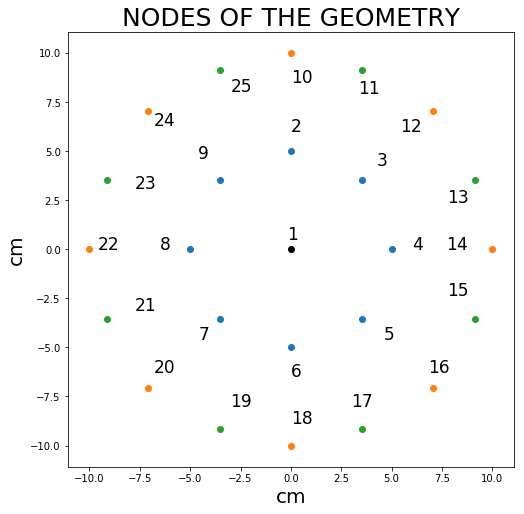

In [4]:
plt.figure(figsize = (8,8))
plt.scatter(0,0,color = 'k')
plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.scatter(X3,Y3)

t_int = [f"{i+1}" for i in range(9)]
t_ext = [f"{i+1}" for i in range(9, 25, 2)]
t_med = [f"{i+1}" for i in range(10,25, 2)]

plt.text(-0.2,0.5,t_int[0],fontsize = 17)
for j in range(3):
    if j == 0:
        for i in range(1,9):
            if i < 4:
                plt.text(1.2*X1[i-1],1.2*Y1[1-i],t_int[i], fontsize = 17)
            elif i >= 4:
                plt.text(1.3*X1[i-1],1.3*Y1[1-i],t_int[i], fontsize = 17)
    elif j == 1:
        for i in range(8):
            if i < 3:
                plt.text(0.77*X2[i],0.85*Y2[i],t_ext[i], fontsize = 17)
            elif i >= 3:
                plt.text(0.96*X2[i],0.89*Y2[i],t_ext[i], fontsize = 17)
    elif j == 2:
        for i in range(8):
            if i == 0:
                plt.text(0.95*X3[i],0.87*Y3[i],t_med[i], fontsize = 17)
            elif i < 3:
                plt.text(0.85*X3[i],0.67*Y3[i],t_med[i], fontsize = 17)
            elif i >= 3:
                plt.text(0.85*X3[i],0.88*Y3[i],t_med[i], fontsize = 17)

plt.title("NODES OF THE GEOMETRY", fontsize = 25)  
plt.xlabel("cm",fontsize = 20)
plt.ylabel("cm",fontsize = 20)

plt.show()

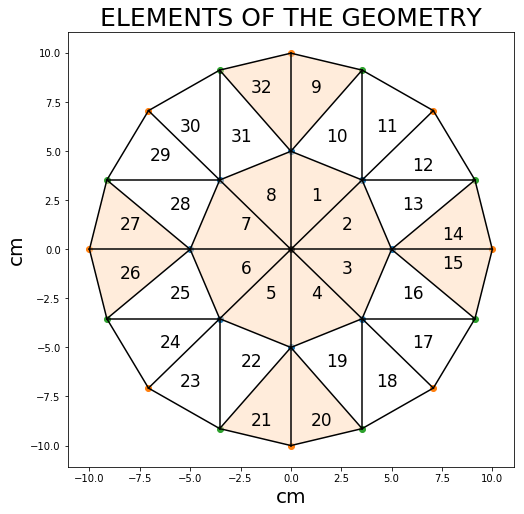

In [5]:
plt.figure(figsize = (8,8))
plt.scatter(0,0,color = 'k')
plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.scatter(X3,Y3)

plt.text(d/5,d/2,"1",fontsize = 17)
plt.text(d/2,d/5,"2",fontsize = 17)
plt.text(d/2,-d/4,"3",fontsize = 17)
plt.text(d/5,-d/2,"4",fontsize = 17)

plt.text(-d/4,-d/2,"5",fontsize = 17)
plt.text(-d/2,-d/4,"6",fontsize = 17)
plt.text(-d/2,d/5,"7",fontsize = 17)
plt.text(-d/4,d/2,"8",fontsize = 17)


plt.text(0.1*D,0.8*D,"9",fontsize = 17)
plt.text(0.35*d,1.1*d,"10",fontsize = 17)
plt.text(0.85*d,1.2*d,"11",fontsize = 17)
plt.text(1.2*d,0.8*d,"12",fontsize = 17)
plt.text(1.1*d,0.4*d,"13",fontsize = 17)
plt.text(0.75*D,0.1*d,"14",fontsize = 17)
plt.text(0.75*D,-0.2*d,"15",fontsize = 17)
plt.text(1.1*d,-0.5*d,"16",fontsize = 17)
plt.text(1.2*d,-d,"17",fontsize = 17)
plt.text(0.85*d,-1.4*d,"18",fontsize = 17)
plt.text(0.35*d,-1.2*d,"19",fontsize = 17)
plt.text(0.1*D,-0.9*D,"20",fontsize = 17)

plt.text(-0.2*D,-0.9*D,"21",fontsize = 17)
plt.text(-0.5*d,-1.2*d,"22",fontsize = 17)
plt.text(-1.1*d,-1.4*d,"23",fontsize = 17)
plt.text(-1.3*d,-d,"24",fontsize = 17)
plt.text(-1.2*d,-0.5*d,"25",fontsize = 17)
plt.text(-0.85*D,-0.3*d,"26",fontsize = 17)

plt.text(-0.85*D,0.2*d,"27",fontsize = 17)
plt.text(-1.2*d,0.4*d,"28",fontsize = 17)
plt.text(-1.4*d,0.9*d,"29",fontsize = 17)
plt.text(-1.1*d,1.2*d,"30",fontsize = 17)
plt.text(-0.6*d,1.1*d,"31",fontsize = 17)
plt.text(-0.4*d,0.8*D,"32",fontsize = 17)

for i in range(8):
    plt.plot([X1[i],X2[i]],[Y1[i],Y2[i]],color = 'k')
    plt.plot([X1[i],X3[i]],[Y1[i],Y3[i]],color = 'k')
    plt.plot([X3[i],X2[i]],[Y3[i],Y2[i]],color = 'k')
    plt.plot([X1[i],0],[Y1[i],0],color = 'k')
    
for i in range(7):
    plt.plot([X3[i],X1[i+1]],[Y3[i],Y1[i+1]],color = 'k')
    plt.plot([X3[i],X2[i+1]],[Y3[i],Y2[i+1]],color = 'k')
    plt.plot([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],color = 'k')
plt.plot([X3[-1],X1[0]],[Y3[-1],Y1[0]],color = 'k')
plt.plot([X3[-1],X2[0]],[Y3[-1],Y2[0]],color = 'k')
plt.plot([X1[-1],X1[0]],[Y1[-1],Y1[0]],color = 'k')

# Shaded triangles have different Areas (In this case, A2) 
for i in range(8):
    if i%2 == 0:
        plt.fill([X1[i],X2[i],X3[i]],[Y1[i],Y2[i],Y3[i]],'peachpuff',alpha=0.5)
        plt.fill([X1[i],X2[i],X3[i-1]],[Y1[i],Y2[i],Y3[i-1]],'peachpuff',alpha=0.5)
    plt.fill([0,X1[i-1],X1[i]],[0,Y1[i-1],Y1[i]],'peachpuff',alpha=0.5)
    
plt.title("ELEMENTS OF THE GEOMETRY",fontsize = 25)  
plt.xlabel("cm",fontsize = 20)
plt.ylabel("cm",fontsize = 20)
plt.show()

In [6]:
# Relevant information of each node
data =[{'N1':1,'N2':2, 'N3':3, 'A':A2,'X1':0, 'Y1':0, 'X2':0, 'Y2':d, 'X3':b, 'Y3':b}, \
       {'N1':1,'N2':3, 'N3':4, 'A':A2,'X1':0, 'Y1':0, 'X2':b, 'Y2':b, 'X3':d, 'Y3':0}, \
       {'N1':1,'N2':4, 'N3':5, 'A':A2,'X1':0, 'Y1':0, 'X2':d, 'Y2':0, 'X3':b, 'Y3':-b}, \
       {'N1':1,'N2':5, 'N3':6, 'A':A2,'X1':0, 'Y1':0, 'X2':b, 'Y2':-b,'X3':0, 'Y3':-d}, \
       {'N1':1,'N2':6, 'N3':7, 'A':A2,'X1':0, 'Y1':0, 'X2':0, 'Y2':-d,'X3':-b,'Y3':-b}, \
       {'N1':1,'N2':7, 'N3':8, 'A':A2,'X1':0, 'Y1':0, 'X2':-b,'Y2':-b,'X3':-d,'Y3':0}, \
       {'N1':1,'N2':8, 'N3':9, 'A':A2,'X1':0, 'Y1':0, 'X2':-d,'Y2':0, 'X3':-b,'Y3':b}, \
       {'N1':1,'N2':9, 'N3':2, 'A':A2,'X1':0, 'Y1':0, 'X2':-b,'Y2':b, 'X3':0, 'Y3':d}, \
       {'N1':2,'N2':10,'N3':11,'A':A2,'X1':0, 'Y1':d, 'X2':0, 'Y2':D, 'X3':b, 'Y3':c}, \
       {'N1':2,'N2':11,'N3':3, 'A':A1,'X1':0, 'Y1':d, 'X2':b, 'Y2':c, 'X3':b, 'Y3':b}, \
       {'N1':3,'N2':11,'N3':12,'A':A1,'X1':b, 'Y1':b, 'X2':b, 'Y2':c, 'X3':c, 'Y3':c}, \
       {'N1':3,'N2':12,'N3':13,'A':A1,'X1':b, 'Y1':b, 'X2':c, 'Y2':c, 'X3':c, 'Y3':b}, \
       {'N1':3,'N2':13,'N3':4, 'A':A1,'X1':b, 'Y1':b, 'X2':c, 'Y2':b, 'X3':d, 'Y3':0}, \
       {'N1':4,'N2':13,'N3':14,'A':A2,'X1':d, 'Y1':0, 'X2':c, 'Y2':b, 'X3':D, 'Y3':0}, \
       {'N1':4,'N2':14,'N3':15,'A':A2,'X1':d, 'Y1':0, 'X2':D, 'Y2':0, 'X3':c, 'Y3':-b}, \
       {'N1':4,'N2':15,'N3':5, 'A':A1,'X1':d, 'Y1':0, 'X2':c, 'Y2':-b,'X3':b, 'Y3':-b}, \
       {'N1':5,'N2':15,'N3':16,'A':A1,'X1':b, 'Y1':-b,'X2':c, 'Y2':-b,'X3':c, 'Y3':-c}, \
       {'N1':5,'N2':16,'N3':17,'A':A1,'X1':b, 'Y1':-b,'X2':c, 'Y2':-c,'X3':b, 'Y3':-c}, \
       {'N1':5,'N2':17,'N3':6, 'A':A1,'X1':b, 'Y1':-b,'X2':b, 'Y2':-c,'X3':0, 'Y3':-d}, \
       {'N1':6,'N2':17,'N3':18,'A':A2,'X1':0, 'Y1':-d,'X2':b, 'Y2':-c,'X3':0, 'Y3':-D}, \
       {'N1':6,'N2':18,'N3':19,'A':A2,'X1':0, 'Y1':-d,'X2':0, 'Y2':-D,'X3':-b,'Y3':-c}, \
       {'N1':6,'N2':19,'N3':7, 'A':A1,'X1':0, 'Y1':-d,'X2':-b,'Y2':-c,'X3':-b,'Y3':-b}, \
       {'N1':7,'N2':19,'N3':20,'A':A1,'X1':-b,'Y1':-b,'X2':-b,'Y2':-c,'X3':-c,'Y3':-c}, \
       {'N1':7,'N2':20,'N3':21,'A':A1,'X1':-b,'Y1':-b,'X2':-c,'Y2':-c,'X3':-c,'Y3':-b}, \
       {'N1':7,'N2':21,'N3':8, 'A':A1,'X1':-b,'Y1':-b,'X2':-c,'Y2':-b,'X3':-d,'Y3':0}, \
       {'N1':8,'N2':21,'N3':22,'A':A2,'X1':-d,'Y1':0, 'X2':-c,'Y2':-b,'X3':-D,'Y3':0}, \
       {'N1':8,'N2':22,'N3':23,'A':A2,'X1':-d,'Y1':0, 'X2':-D,'Y2':0, 'X3':-c,'Y3':b}, \
       {'N1':8,'N2':23,'N3':9, 'A':A1,'X1':-d,'Y1':0, 'X2':-c,'Y2':b, 'X3':-b,'Y3':b}, \
       {'N1':9,'N2':23,'N3':24,'A':A1,'X1':-b,'Y1':b, 'X2':-c,'Y2':b, 'X3':-c,'Y3':c}, \
       {'N1':9,'N2':24,'N3':25,'A':A1,'X1':-b,'Y1':b, 'X2':-c,'Y2':c, 'X3':-b,'Y3':c}, \
       {'N1':9,'N2':25,'N3':2, 'A':A1,'X1':-b,'Y1':b, 'X2':-b,'Y2':c, 'X3':0, 'Y3':d}, \
       {'N1':2,'N2':25,'N3':10,'A':A2,'X1':0, 'Y1':d, 'X2':-b,'Y2':c, 'X3':0, 'Y3':D}]


In [7]:
df = pd.DataFrame(data)
df.replace(np.nan, 0, inplace=True)

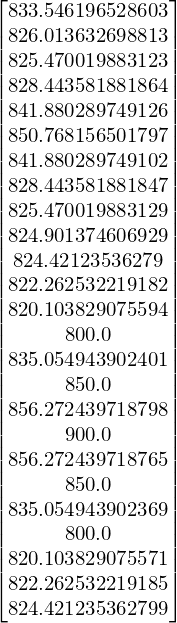

In [8]:
# THERMAL ANALYSIS
x1,x2,x3 = sp.symbols('x_1,x_2,x_3')
y1,y2,y3 = sp.symbols('y_1,y_2,y_3')
x,y,A    = sp.symbols('x,y,A')

T1,T2,T3 = sp.symbols('T_1,T_2,T_3')
b1,b2,b3 = sp.symbols('b_1,b_2,b_3')
c1,c2,c3 = sp.symbols('c_1,c_2,c_3')

K = sp.Matrix([[b1*b1+c1*c1, b1*b2+c1*c2, b1*b3+c1*c3],
               [b2*b1+c2*c1, b2*b2+c2*c2, b2*b3+c2*c3],
               [b3*b1+c3*c1, b3*b2+c3*c2, b3*b3+c3*c3]])

K = (k/(4*A))*K

K_e = [K.subs({b1:(df['Y2'][i]-df['Y3'][i]), \
               c1:(df['X3'][i]-df['X2'][i]), \
               b2:(df['Y3'][i]-df['Y1'][i]), \
               c2:(df['X1'][i]-df['X3'][i]), \
               b3:(df['Y1'][i]-df['Y2'][i]), \
               c3:(df['X2'][i]-df['X1'][i]), \
                A: df['A'][i]}) for i in range(nE)]

Ni = ["N1","N2","N3"] 

# Assembly of matrices
M = sp.zeros(nN)

for l in range(nE):
    for i in range(3):
        for j in range(3):
            ii = df[Ni[i]][l]-1
            jj = df[Ni[j]][l]-1
            M[ii,jj] = M[ii,jj] + K_e[l][i,j]

# Values of known temperature
NT_con = [13,15,17,19,21]
T_con  = [800,850,900,850,800]

F = sp.zeros(nN).col(0)


for i in range(len(NT_con)):
    F[NT_con[i]] = T_con[i] 
    
for j in range(nN):
    for i in NT_con:
        M[i,j] = 0
        M[i,i] = 1
# Resolved temperature
T = (M.inv())*F
T

## Solution plotted in Origin. 

<img src="Tsol.png" width="500">


In [9]:
# MECHANICAL ANALYSIS
B = 1/(2*A)*sp.Matrix([[b1,0,b2,0,b3,0],
                       [0,c1,0,c2,0,c3],
                       [c1,b1,c2,b2,c3,b3]])
B_e = [B.subs({b1:(df['Y2'][i]-df['Y3'][i]), \
               c1:(df['X3'][i]-df['X2'][i]), \
               b2:(df['Y3'][i]-df['Y1'][i]), \
               c2:(df['X1'][i]-df['X3'][i]), \
               b3:(df['Y1'][i]-df['Y2'][i]), \
               c3:(df['X2'][i]-df['X1'][i]), \
                A: df['A'][i]}) for i in range(nE)]


D = sp.Matrix([[E/(1-v*v),E*v/(1-v*v),0], \
              [v*E/(1-v*v),E/(1-v*v),0],  \
              [0,0,E/(2*(1+v))]])


KMM = t * B.T * D * B * A
KMM_e = [KMM.subs({b1:(df['Y2'][i]-df['Y3'][i]), \
                c1:(df['X3'][i]-df['X2'][i]), \
                b2:(df['Y3'][i]-df['Y1'][i]), \
                c2:(df['X1'][i]-df['X3'][i]), \
                b3:(df['Y1'][i]-df['Y2'][i]), \
                c3:(df['X2'][i]-df['X1'][i]), \
                 A: df['A'][i]}) for i in range(nE)]


FMM = (E*alf*t)/(6*(1-v))*(T1+T2+T3-3*T0)*sp.Matrix([b1,c1,b2,c2,b3,c3])
FMM_e = [FMM.subs({b1:(df['Y2'][i]-df['Y3'][i]), \
                c1:(df['X3'][i]-df['X2'][i]), \
                b2:(df['Y3'][i]-df['Y1'][i]), \
                c2:(df['X1'][i]-df['X3'][i]), \
                b3:(df['Y1'][i]-df['Y2'][i]), \
                c3:(df['X2'][i]-df['X1'][i]), \
                T1:T[df["N1"][i]-1], \
                T2:T[df["N2"][i]-1], \
                T3:T[df["N3"][i]-1] }) for i in range(nE)]

BDu = 1/(2*A)*sp.Matrix([[b1,0 ,b2,0 ,b3, 0], \
                         [ 0,c1, 0,c2,0 ,c3], \
                         [c1,b1,c2,b2,c3,b3]])

BDu_e = [BDu.subs({b1:(df['Y2'][i]-df['Y3'][i]), \
                   c1:(df['X3'][i]-df['X2'][i]), \
                   b2:(df['Y3'][i]-df['Y1'][i]), \
                   c2:(df['X1'][i]-df['X3'][i]), \
                   b3:(df['Y1'][i]-df['Y2'][i]), \
                   c3:(df['X2'][i]-df['X1'][i]), \
                    A: df['A'][i]}) for i in range(nE)]

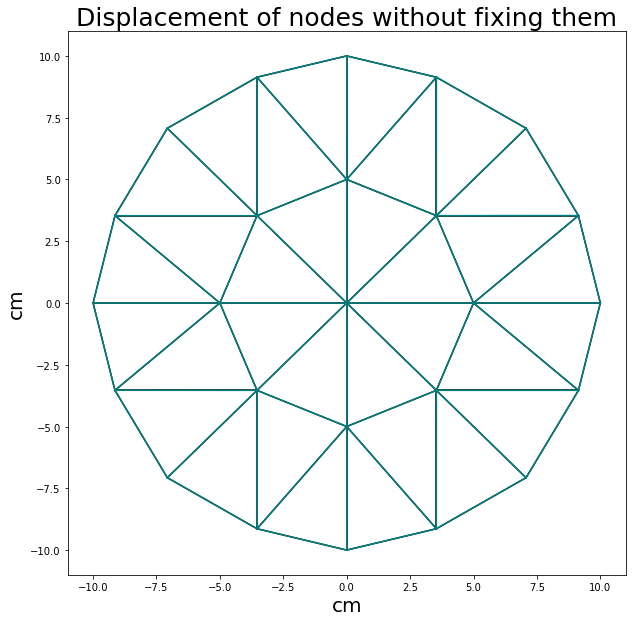

In [10]:
# Assembly of matrices
KMM_E = sp.zeros(2*nN)
FMM_E = sp.zeros(2*nN).col(0)

for l in range(nE):
    for i in range(3):
        for j in range(3):
            ii = df[Ni[i]][l]-1
            jj = df[Ni[j]][l]-1
            KMM_E[ii*2,jj*2]     = KMM_E[ii*2,jj*2]     + KMM_e[l][i*2,j*2]
            KMM_E[ii*2+1,jj*2]   = KMM_E[ii*2+1,jj*2]   + KMM_e[l][i*2+1,j*2]
            KMM_E[ii*2,jj*2+1]   = KMM_E[ii*2,jj*2+1]   + KMM_e[l][i*2,j*2+1]
            KMM_E[ii*2+1,jj*2+1] = KMM_E[ii*2+1,jj*2+1] + KMM_e[l][i*2+1,j*2+1]
        FMM_E[ii*2] = FMM_E[ii*2] + FMM_e[l][i*2]
        FMM_E[ii*2+1] = FMM_E[ii*2+1] + FMM_e[l][i*2+1]

# Displacement of nodes without fixing them
Uo = (KMM_E.inv())*FMM_E

Xo  = Uo[0] 
Yo  = Uo[1]
Xo1 = [X1[i]+Uo[i+1]      for i in range(nA)] 
Yo1 = [Y1[i]+Uo[i+2]      for i in range(nA)] 
Xo2 = [X2[i]+Uo[2*nA+i]   for i in range(nA)]
Yo2 = [Y2[i]+Uo[2*nA+i+1] for i in range(nA)]
Xo3 = [X3[i]+Uo[3*nA+i]   for i in range(nA)]
Yo3 = [Y3[i]+Uo[3*nA+i+1] for i in range(nA)]

plt.figure(figsize = (10,10))
for i in range(8):
    plt.plot([X1[i],X2[i]],[Y1[i],Y2[i]],color = 'k')
    plt.plot([X1[i],X3[i]],[Y1[i],Y3[i]],color = 'k')
    plt.plot([X3[i],X2[i]],[Y3[i],Y2[i]],color = 'k')
    plt.plot([X1[i],0],[Y1[i],0],color = 'k')
    
for i in range(7):
    plt.plot([X3[i],X1[i+1]],[Y3[i],Y1[i+1]],color = 'k')
    plt.plot([X3[i],X2[i+1]],[Y3[i],Y2[i+1]],color = 'k')
    plt.plot([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],color = 'k')
plt.plot([X3[-1],X1[0]],[Y3[-1],Y1[0]],color = 'k')
plt.plot([X3[-1],X2[0]],[Y3[-1],Y2[0]],color = 'k')
plt.plot([X1[-1],X1[0]],[Y1[-1],Y1[0]],color = 'k')

for i in range(8):
    plt.plot([Xo1[i],Xo2[i]],[Yo1[i],Yo2[i]],color = 'teal')
    plt.plot([Xo1[i],Xo3[i]],[Yo1[i],Yo3[i]],color = 'teal')
    plt.plot([Xo3[i],Xo2[i]],[Yo3[i],Yo2[i]],color = 'teal')
    plt.plot([Xo1[i],0],[Yo1[i],0],color = 'teal')    
for i in range(7):
    plt.plot([Xo3[i],Xo1[i+1]],[Yo3[i],Yo1[i+1]],color = 'teal')
    plt.plot([Xo3[i],Xo2[i+1]],[Yo3[i],Yo2[i+1]],color = 'teal')
    plt.plot([Xo1[i],Xo1[i+1]],[Yo1[i],Yo1[i+1]],color = 'teal')
plt.plot([Xo3[-1],Xo1[0]],[Yo3[-1],Yo1[0]],color = 'teal')
plt.plot([Xo3[-1],Xo2[0]],[Yo3[-1],Yo2[0]],color = 'teal')
plt.plot([Xo1[-1],Xo1[0]],[Yo1[-1],Yo1[0]],color = 'teal')

plt.title("Displacement of nodes without fixing them",fontsize = 25)  
plt.xlabel("cm",fontsize = 20)
plt.ylabel("cm",fontsize = 20)

plt.show()

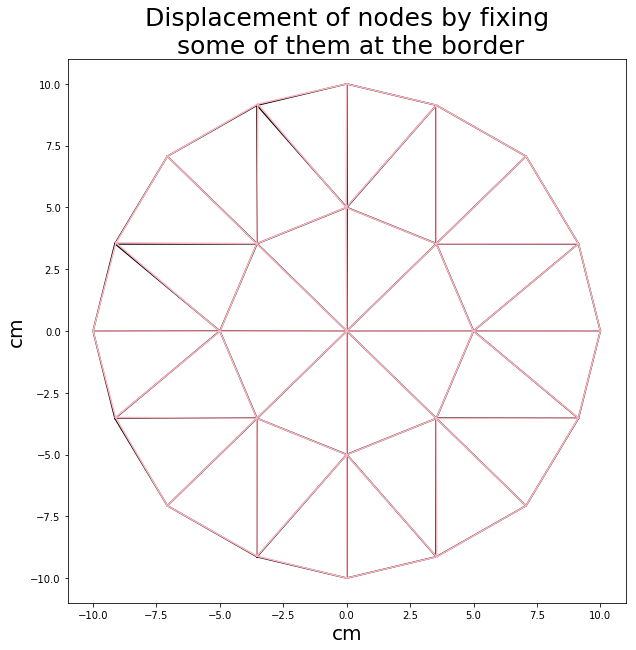

In [11]:
# Displacement of nodes with fixing some of them at the border
nodos = [i for i in range(9,25)]
for i in nodos:
    FMM_E[i]   = 0.0
    FMM_E[i+1] = 0.0
    for j in range(2*nN):
        KMM_E[i,j] = 0.0
    KMM_E[i,i] = 1
    
U1 = (KMM_E.inv())*FMM_E


X11 = U1[0] 
Y11 = U1[1]
X11 = [X1[i]+U1[i+1]      for i in range(nA)] 
Y11 = [Y1[i]+U1[i+2]      for i in range(nA)] 
X12 = [X2[i]+U1[2*nA+i]   for i in range(nA)]
Y12 = [Y2[i]+U1[2*nA+i+1] for i in range(nA)]
X13 = [X3[i]+U1[3*nA+i]   for i in range(nA)]
Y13 = [Y3[i]+U1[3*nA+i+1] for i in range(nA)]


plt.figure(figsize = (10,10))
for i in range(8):
    plt.plot([X1[i],X2[i]],[Y1[i],Y2[i]],color = 'k')
    plt.plot([X1[i],X3[i]],[Y1[i],Y3[i]],color = 'k')
    plt.plot([X3[i],X2[i]],[Y3[i],Y2[i]],color = 'k')
    plt.plot([X1[i],0],[Y1[i],0],color = 'k')
    
for i in range(7):
    plt.plot([X3[i],X1[i+1]],[Y3[i],Y1[i+1]],color = 'k')
    plt.plot([X3[i],X2[i+1]],[Y3[i],Y2[i+1]],color = 'k')
    plt.plot([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],color = 'k')
plt.plot([X3[-1],X1[0]],[Y3[-1],Y1[0]],color = 'k')
plt.plot([X3[-1],X2[0]],[Y3[-1],Y2[0]],color = 'k')
plt.plot([X1[-1],X1[0]],[Y1[-1],Y1[0]],color = 'k')

for i in range(8):
    plt.plot([X11[i],X12[i]],[Y11[i],Y12[i]],color = 'lightpink')
    plt.plot([X11[i],X13[i]],[Y11[i],Y13[i]],color = 'lightpink')
    plt.plot([X13[i],X12[i]],[Y13[i],Y12[i]],color = 'lightpink')
    plt.plot([X11[i],0],[Y11[i],0],color = 'lightpink')    
for i in range(7):
    plt.plot([X13[i],X11[i+1]],[Y13[i],Y11[i+1]],color = 'lightpink')
    plt.plot([X13[i],X12[i+1]],[Y13[i],Y12[i+1]],color = 'lightpink')
    plt.plot([X11[i],X11[i+1]],[Y11[i],Y11[i+1]],color = 'lightpink')
plt.plot([X13[-1],X11[0]],[Y13[-1],Y11[0]],color = 'lightpink')
plt.plot([X13[-1],X12[0]],[Y13[-1],Y12[0]],color = 'lightpink')
plt.plot([X11[-1],X11[0]],[Y11[-1],Y11[0]],color = 'lightpink')

plt.title(" Displacement of nodes by fixing \n some of them at the border",fontsize = 25)  
plt.xlabel("cm",fontsize = 20)
plt.ylabel("cm",fontsize = 20)


plt.show()